In [12]:
import os
import random
import kagglehub
import cv2 as cv
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
from tqdm import tqdm
from sklearn.model_selection import KFold
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report


In [3]:
from google.colab import files
uploaded = files.upload()

Saving animal_dataset.zip to animal_dataset.zip


In [4]:
import zipfile
import os

zip_path = "animal_dataset.zip"
extract_path = "/content/animal_dataset"

with zipfile.ZipFile(zip_path, 'r') as z:
    z.extractall(extract_path)

print("Extracted to:", extract_path)


Extracted to: /content/animal_dataset


In [9]:
# Download latest version
path = "/content/animal_dataset/animal_dataset"

print("Path to dataset files:", path)

# view the directory structure
os.listdir(path)

Path to dataset files: /content/animal_dataset/animal_dataset


['panda', 'dog', 'cat']

In [10]:
# construct the path to dataset
categories_path = path
categories_path = path
categories = os.listdir(categories_path)
print('categories: ', categories)

categories:  ['panda', 'dog', 'cat']


In [13]:
train_data = []

for c in categories:
  print(c)
  # path to the images of individual animal category
  individual_category_path = os.path.join(categories_path, c)
  # integer class of a category
  class_idx = categories.index(c)

  # all images of an individual category
  category_imgs = os.listdir(individual_category_path)
  # randomly select 100 images
  selected_imgs = random.sample(category_imgs, 100)

  # change color space to b&w and resize
  for img in tqdm(selected_imgs):
    img_path = os.path.join(individual_category_path, img)

    try:
      single_img = cv.imread(img_path)
      single_img = cv.cvtColor(single_img, cv.COLOR_BGR2GRAY)
      single_img = cv.resize(single_img, (32, 32))
      train_data.append([single_img, class_idx])
    except Exception as e:
      print('error', e)

# random.shuffle(train_data)
print('\nSize of dataset', len(train_data))

panda


100%|██████████| 100/100 [00:00<00:00, 135.91it/s]


dog


100%|██████████| 100/100 [00:00<00:00, 344.92it/s]


cat


100%|██████████| 100/100 [00:00<00:00, 416.47it/s]


Size of dataset 300


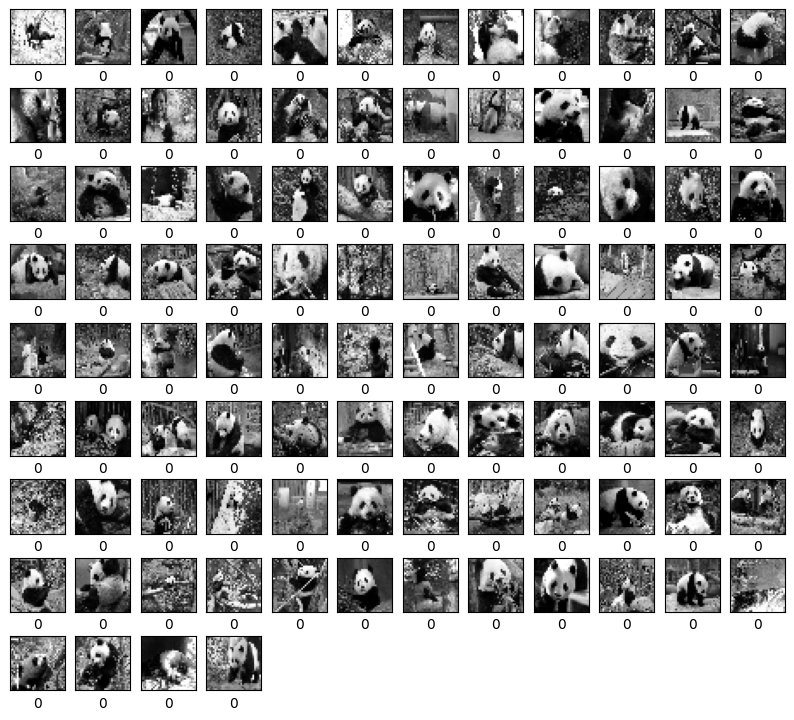

In [14]:
plt.figure(figsize=(10,10))
i=0
for r in range(10):
  for c in range(10):
    plt.subplot(10,12,i+1)
    plt.imshow(train_data[i][0],cmap='gray')
    plt.xticks([])
    plt.yticks([])
    plt.xlabel(train_data[i][1])
    i+=1
plt.show()

In [15]:
images = np.array([img[0] for img in train_data])
labels = np.array([label[1] for label in train_data])

print(images.shape)

# flatten the image data
images = images.reshape(images.shape[0], -1)

print("Shape of flattened images:", images.shape)

# normalize the data to [0, 1] range
images = images.astype('float32') / 255.0

(300, 32, 32)
Shape of flattened images: (300, 1024)


## Set up hyperparameters

In [16]:
# 5-fold cross validation
n_fold = KFold(n_splits=5, shuffle=True, random_state=42)

# different k values to test
k_values = [1, 3, 5, 7, 9]

# dictionaries to record the accuracy achieved by the model for each value of K
l1_accuracies = {k: [] for k in k_values}
l2_accuracies = {k: [] for k in k_values}

In [17]:
print('starting cross-validation...')
for fold, (train_idx, val_idx) in enumerate(n_fold.split(images)):
  print(f'processing fold {fold+1}...')

  # split dataset into training and validation for current fold
  x_train, x_val = images[train_idx], images[val_idx]
  y_train, y_val = labels[train_idx], labels[val_idx]

  # evaluate different k values for bot L1 and L2 distances
  for k in k_values:
    # L1 distance
    knn_l1 = KNeighborsClassifier(n_neighbors=k, p=1)
    knn_l1.fit(x_train, y_train)
    y_pred_l1 = knn_l1.predict(x_val)
    accuracy_l1 = accuracy_score(y_val, y_pred_l1)
    l1_accuracies[k].append(accuracy_l1)

    # L2 distance
    knn_l2 = KNeighborsClassifier(n_neighbors=k, p=2)
    knn_l2.fit(x_train, y_train)
    y_pred_l2 = knn_l2.predict(x_val)
    accuracy_l2 = accuracy_score(y_val, y_pred_l2)
    l2_accuracies[k].append(accuracy_l2)

    print(f"Fold {fold+1}, K={k}: L1 Accuracy={accuracy_l1:.4f}, L2 Accuracy={accuracy_l2:.4f}")

starting cross-validation...
processing fold 1...
Fold 1, K=1: L1 Accuracy=0.3833, L2 Accuracy=0.3833
Fold 1, K=3: L1 Accuracy=0.5167, L2 Accuracy=0.4833
Fold 1, K=5: L1 Accuracy=0.4333, L2 Accuracy=0.3667
Fold 1, K=7: L1 Accuracy=0.4167, L2 Accuracy=0.3000
Fold 1, K=9: L1 Accuracy=0.4833, L2 Accuracy=0.3500
processing fold 2...
Fold 2, K=1: L1 Accuracy=0.3833, L2 Accuracy=0.3333
Fold 2, K=3: L1 Accuracy=0.4333, L2 Accuracy=0.3833
Fold 2, K=5: L1 Accuracy=0.4000, L2 Accuracy=0.4667
Fold 2, K=7: L1 Accuracy=0.3833, L2 Accuracy=0.3500
Fold 2, K=9: L1 Accuracy=0.5333, L2 Accuracy=0.4000
processing fold 3...
Fold 3, K=1: L1 Accuracy=0.3833, L2 Accuracy=0.3500
Fold 3, K=3: L1 Accuracy=0.4000, L2 Accuracy=0.3833
Fold 3, K=5: L1 Accuracy=0.4500, L2 Accuracy=0.4000
Fold 3, K=7: L1 Accuracy=0.4167, L2 Accuracy=0.4333
Fold 3, K=9: L1 Accuracy=0.4667, L2 Accuracy=0.4500
processing fold 4...
Fold 4, K=1: L1 Accuracy=0.3167, L2 Accuracy=0.3333
Fold 4, K=3: L1 Accuracy=0.3167, L2 Accuracy=0.3000
Fol

In [18]:
avg_l1_accuracies = {k: np.mean(acc) for k, acc in l1_accuracies.items()}
avg_l2_accuracies = {k: np.mean(acc) for k, acc in l2_accuracies.items()}

print('Average accuracies across all 5 folds:')
for k in k_values:
  print(f'K={k}, L1: {avg_l1_accuracies[k]:.4f}, L2: {avg_l2_accuracies[k]:.4f}')

Average accuracies across all 5 folds:
K=1, L1: 0.3700, L2: 0.3567
K=3, L1: 0.4267, L2: 0.3900
K=5, L1: 0.4133, L2: 0.3800
K=7, L1: 0.3833, L2: 0.3700
K=9, L1: 0.4467, L2: 0.3733


In [19]:
best_k_l1 = max(avg_l1_accuracies, key=avg_l1_accuracies.get)
best_k_l2 = max(avg_l2_accuracies, key=avg_l2_accuracies.get)

print(f'Best K for Manhattan(L1): {best_k_l1}, Accuracy: {avg_l1_accuracies[best_k_l1]:.4f}')
print(f'Best K for Euclidean(L2): {best_k_l2}, Accuracy: {avg_l2_accuracies[best_k_l2]:.4f}')

Best K for Manhattan(L1): 9, Accuracy: 0.4467
Best K for Euclidean(L2): 3, Accuracy: 0.3900


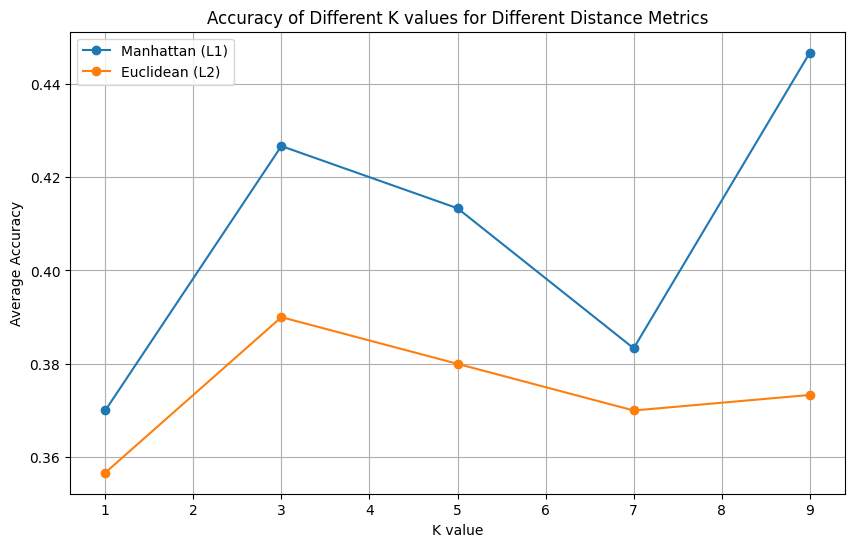

In [20]:
plt.figure(figsize=(10, 6))
plt.plot(k_values, [avg_l1_accuracies[k] for k in k_values], marker='o', label='Manhattan (L1)')
plt.plot(k_values, [avg_l2_accuracies[k] for k in k_values], marker='o', label='Euclidean (L2)')
plt.title('Accuracy of Different K values for Different Distance Metrics')
plt.xlabel('K value')
plt.ylabel('Average Accuracy')
plt.legend()
plt.grid(True)
plt.show()

## Determine which distance metric performs better

In [21]:
if avg_l1_accuracies[best_k_l1] > avg_l2_accuracies[best_k_l2]:
  print('Manhattan performs better')
  best_metric = 1
  best_k = best_k_l1
elif avg_l2_accuracies[best_k_l2] > avg_l1_accuracies[best_k_l1]:
  print('Euclidean performs better')
  best_metric = 2
  best_k = best_k_l2
else:
  print('Both metrics perform equally well')
  # default to l1 if equal
  best_metric = 1
  best_k = best_k_l1

Manhattan performs better


## Final model with the best parameters on the full training set

In [22]:
final_knn = KNeighborsClassifier(n_neighbors=best_k, p=best_metric)
final_knn.fit(images, labels)

KNeighborsClassifier(n_neighbors=9, p=1)

In [23]:
# Select the last 5 images from each category
test_data = []
for c in categories:
    # class label
    class_idx = categories.index(c)
    # path to the individual category
    individual_category_path = os.path.join(categories_path, c)
    # all images of a category
    category_imgs = os.listdir(individual_category_path)
    category_imgs.sort()
    selected_imgs = category_imgs[-5:]

    # change color space to b&w and resize
    for img in selected_imgs:
        img_path = os.path.join(individual_category_path, img)

        try:
          single_img = cv.imread(img_path)
          single_img = cv.cvtColor(single_img, cv.COLOR_BGR2GRAY)
          single_img = cv.resize(single_img, (32, 32))
          test_data.append([single_img, class_idx])
        except Exception as e:
          print('error', e)

random.shuffle(test_data)

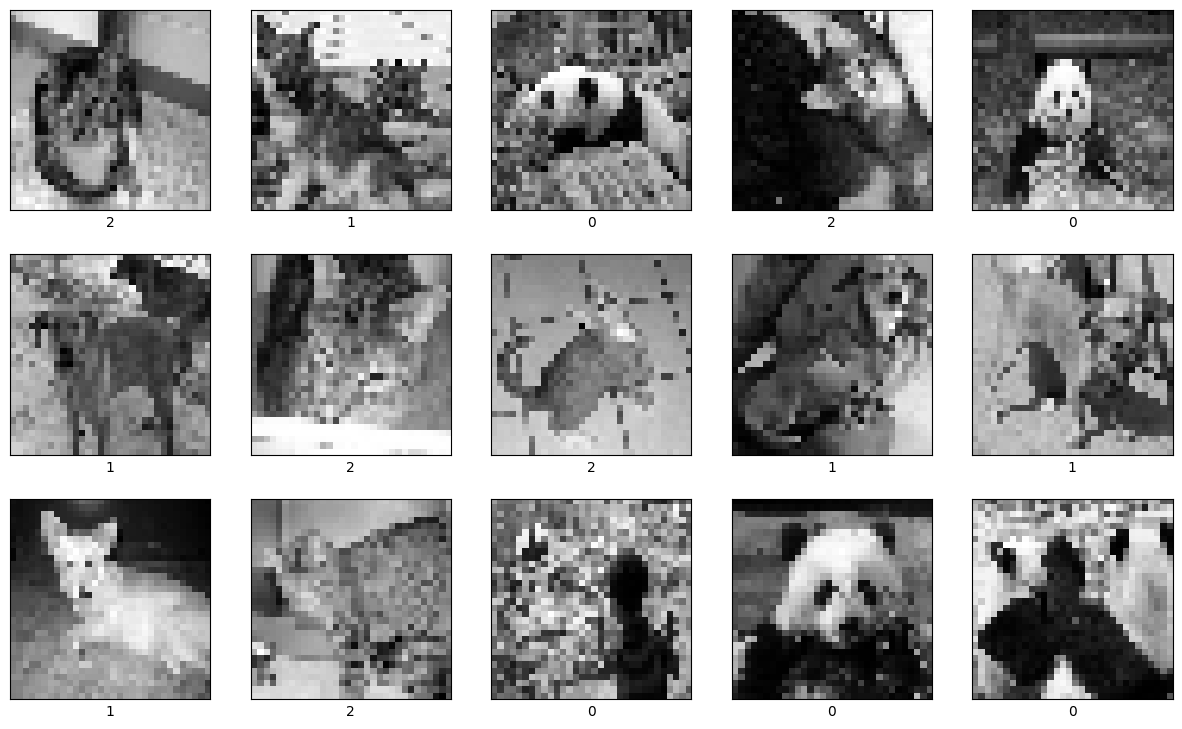

In [24]:
plt.figure(figsize=(15, 9))

for i in range(len(test_data)):
    plt.subplot(3, 5, i + 1)
    plt.imshow(test_data[i][0], cmap='gray')
    plt.xticks([])
    plt.yticks([])
    plt.xlabel(test_data[i][1])

plt.show()

In [25]:
x_test = np.array([img[0] for img in test_data])
y_test = np.array([label[1] for label in test_data])

print(x_test.shape)

# flatten the images
x_test = x_test.reshape(x_test.shape[0], -1)

# normalize the images
x_test = x_test.astype('float32') / 255.0

print(x_test.shape)
print(y_test)

(15, 32, 32)
(15, 1024)
[2 1 0 2 0 1 2 2 1 1 1 2 0 0 0]


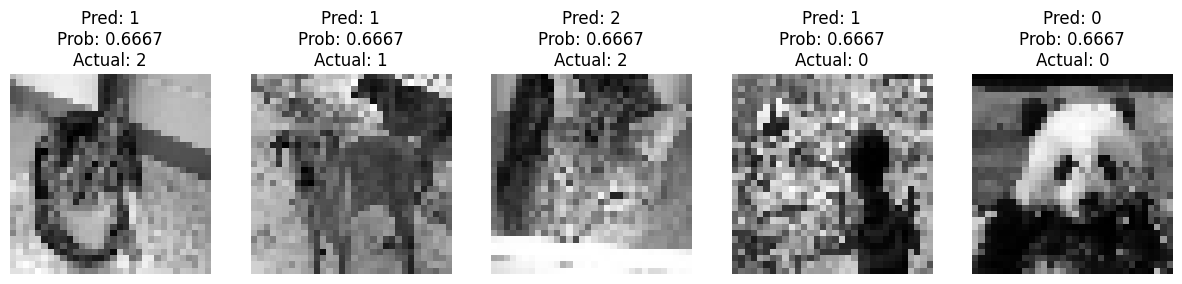

In [26]:
import matplotlib.pyplot as plt

# Predict probabilities for the test set
probabilities = final_knn.predict_proba(x_test)

# Get the predicted classes
predicted_classes = final_knn.predict(x_test)

# Combine predictions, probabilities, and actual labels
predictions_with_details = []
for i in range(len(x_test)):
  predictions_with_details.append({
      'prediction': predicted_classes[i],
      'probability': max(probabilities[i]),
      'actual': y_test[i],
      'image': test_data[i][0] # Include the image data
  })

# Sort by probability in descending order
predictions_with_details.sort(key=lambda x: x['probability'], reverse=True)

# Get the top 5
top5_predictions = predictions_with_details[:5]

# Display the top 5 predictions with images
plt.figure(figsize=(15, 10))
for i, pred in enumerate(top5_predictions):
  plt.subplot(1, 5, i+1)
  plt.imshow(pred['image'], cmap='gray')
  plt.title(f"Pred: {pred['prediction']}\nProb: {pred['probability']:.4f}\nActual: {pred['actual']}")
  plt.axis('off')
plt.show()